In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('loan_pred.xlsx')

print("Dataset Head:\n", data.head())

Dataset Head:
     Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2    

In [5]:

print("\nMissing values in the dataset:\n", data.isnull().sum())

data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)

data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

for column in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    data[column].fillna(data[column].mode()[0], inplace=True)

print("\nSummary Statistics:\n", data.describe())



Missing values in the dataset:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Summary Statistics:
        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  146.412162        342.410423   
std        6109.041673        2926.248369   84.037468         64.428629   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  129.000000        360.000000   
75%        5795.000000        2297.250000  164.750000        360.000000   
max       81000.0000

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20060\2420139709.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20060\2420139709.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

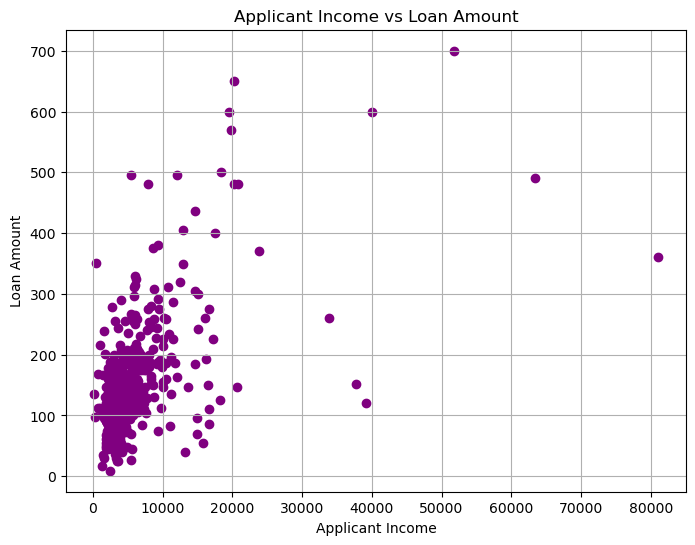

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(x = data['ApplicantIncome'], y = data['LoanAmount'], color='purple')
plt.title('Applicant Income vs Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.grid(True)
plt.show()

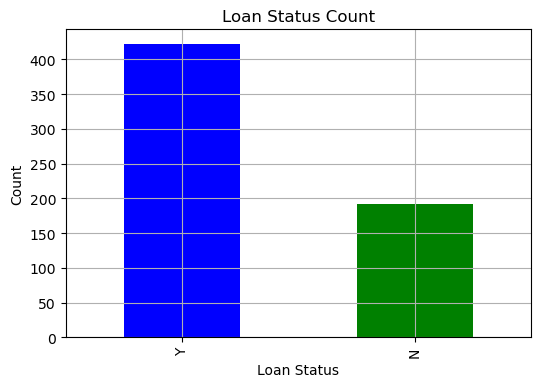

In [9]:
plt.figure(figsize=(6,4))
data['Loan_Status'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title('Loan Status Count')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()

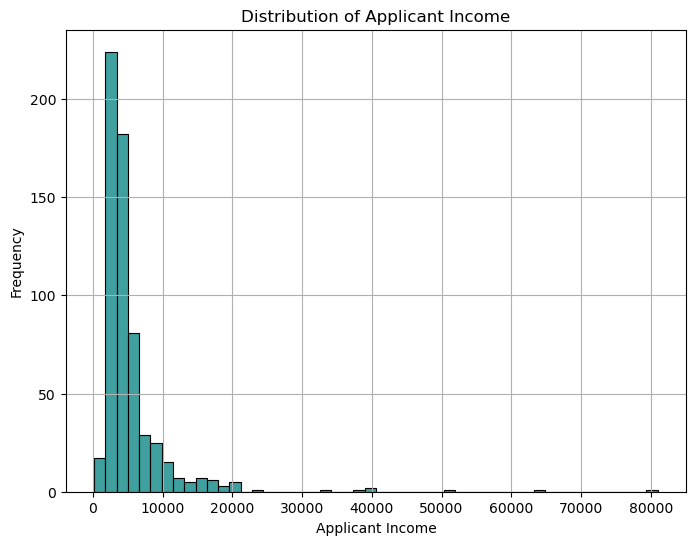

In [20]:
plt.figure(figsize=(8,6))
sns.histplot(data['ApplicantIncome'], bins=50, color='teal')
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\npati\AppData\Local\Temp\ipykernel_33260\4027919999.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Status', data=data, palette='Set1')


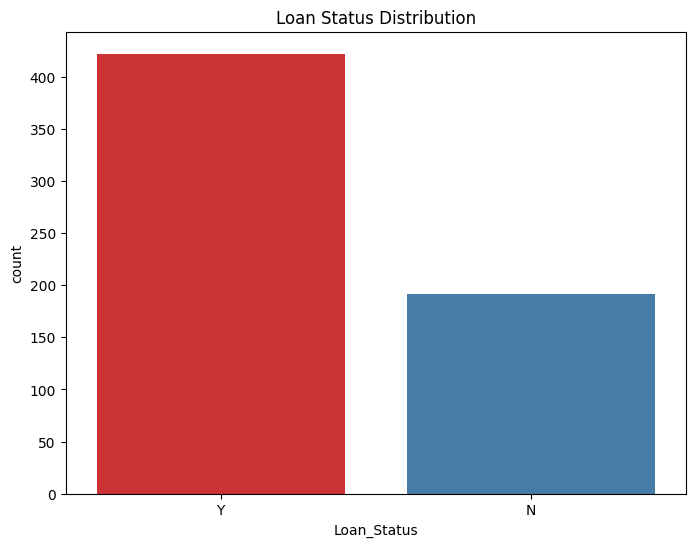

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(x='Loan_Status', data=data, palette='Set1')
plt.title('Loan Status Distribution')
plt.show()

C:\Users\npati\AppData\Local\Temp\ipykernel_33260\4019792546.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education', y='ApplicantIncome', data=data, palette='Set2')


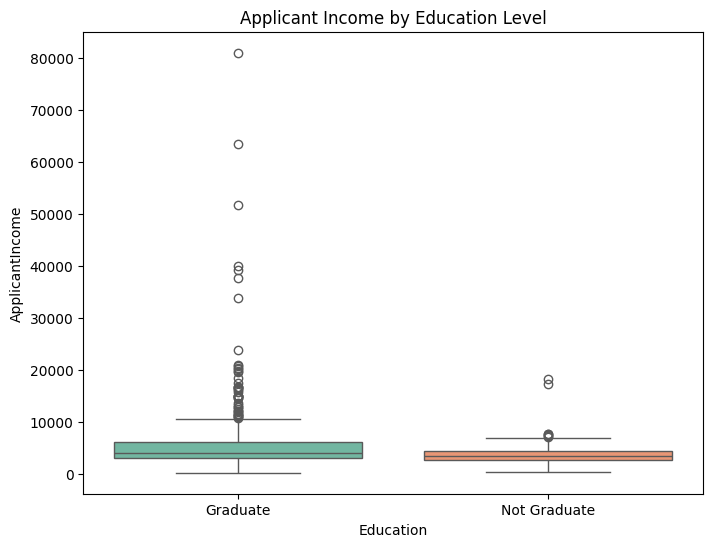

In [9]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Education', y='ApplicantIncome', data=data, palette='Set2')
plt.title('Applicant Income by Education Level')
plt.show()

<Figure size 800x600 with 0 Axes>

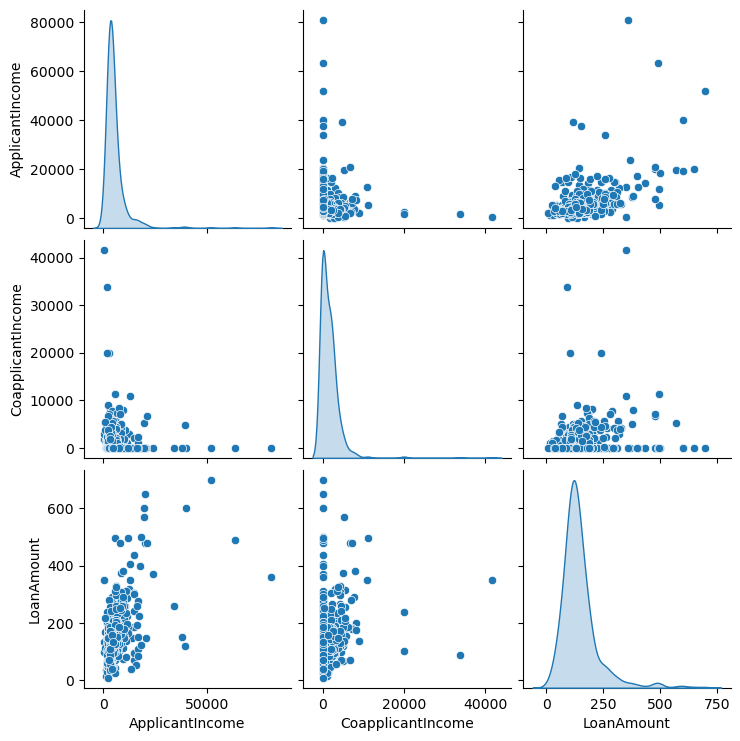

In [47]:
plt.figure(figsize=(8,6))
sns.pairplot(data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']], diag_kind='kde')
plt.show()

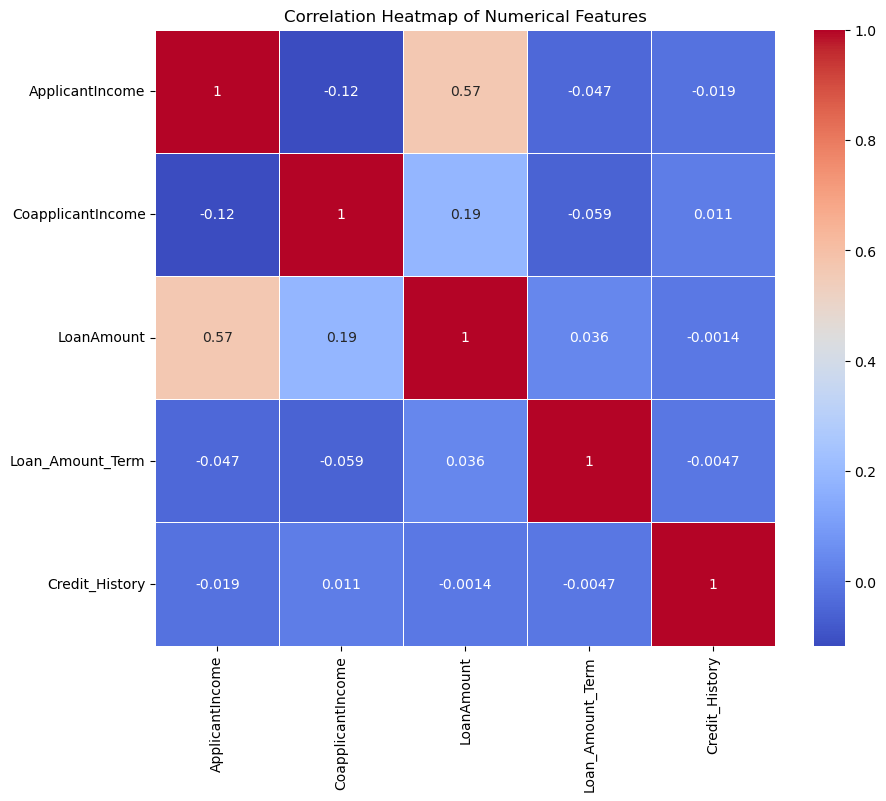

In [28]:
plt.figure(figsize=(10,8))
numeric_data = data.select_dtypes(include = 'number')
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()